In [46]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rand

In [47]:
def sigmoid(x):
    s = 1.0/(1.0 + np.exp(-x))
    # cache = s
    # return s, cache
    return s

In [48]:
def softmax(x):
    # test = np.asarray(x)
    e = np.exp(x)
    s = np.divide(e, np.sum(e, axis=0))
    # print(x.shape)
    # print(np.sum(x, axis=0).shape)
    # s = np.exp(test)/test.sum(0)
    return s

In [49]:
def one_hot_encoding(y, m):

    encoded_matrix = np.zeros((m, 10))

    for i in range(m):
        # print(y[0, i])
        encoded_matrix[i, y[0, i]] = 1.0
      
    return encoded_matrix

In [50]:
# def forward_propogation(w, b, a):
def forward_propagation(w1, w2, b1, b2, a0):
    z1 = np.dot(w1, a0) + b1
    a1 = sigmoid(z1)

    assert(z1.shape == (w1.shape[0], a1.shape[1]))

    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    # a2 = sigmoid(z2)
    # 
    # z = np.dot(w, a) + b
    # 
    # lin_cache = (a, w, b)
    # 
    # activation, a_cache = sigmoid(z)
    # cache = (lin_cache, a_cache)
    # 
    return a1, a2
    # return activation, cache

In [51]:
# def backward_propogation(da_curr, cache):
def backward_propagation(a1, a2, x, y, m, w2):

    dz2 = a2 - y
    # print(dz2.shape, a1.shape)
    dw2 = (1.0/m)*np.dot(dz2, a1.T)
    db2 = (1.0/m) * np.sum(dz2, axis=1, keepdims=True)

    # da1 = np.dot(w2.T, dz2)
    # dz1 = da1 * a1 * (1-a1)
    # dz1 = np.dot(dw2.T, dz2)*(a1*(1-a1))

    dz1 = np.dot(w2.T, dz2)*(a1*(1-a1))
    # dw1 = (1.0/m) * np.dot(dz1, x.T)
    dw1 = (1.0/m) * np.dot(dz1, x.T)
    db1 = (1.0/m) * np.sum(dz1, axis=1, keepdims=True)
    # print(dw2.shape, dw1.shape)
    
    # l_cache, a_cache = cache
    # a_prev, w, b = l_cache
    # 
    # m = a_prev.shape[1]
    # 
    # s, c = sigmoid(a_cache)
    # 
    # dz = da_curr * s * (1-s)
    # assert (dz.shape == da_curr.shape)
    # # dz = da_curr - y
    # 
    # dw = (1.0/m) * np.dot(dz, l_cache[0].T)
    # db = (1.0/m) * np.sum(dz, axis=1, keepdims=True)
    # da_prev = np.dot(l_cache[1].T, dz)
    return dw1, dw2, db1, db2
    # return dw, db, da_prev

0.056174752345117686


(10, 3500)
[0.08654475 0.08654454 0.0865446  0.08654471 0.08831734 0.0865451
 0.08654572 0.08664269 0.08654457 0.21922599]


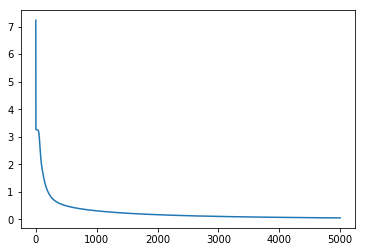

In [81]:
def gradient_descent():
    data = pd.read_csv('ex3_train.csv')
    x = data.drop('y', axis=1).T
    y = data['y'].values.reshape(1, -1)
    m = y.shape[1]
    cost = []
    
    alpha = 1 
    epochs = 5000
    
    # init weights and bias
    np.random.seed(1)
    w1 = np.random.rand(25, 400) * 0.01
    b1 = np.zeros((25, 1))
    w2 = np.random.rand(10, 25) * 0.01
    b2 = np.zeros((10, 1))

    y = one_hot_encoding(y, y.shape[1]).T
    
    for epoch in range(epochs):
        
        a1, a2 = forward_propagation(w1, w2, b1, b2, x)

        loss = -(1.0/m) * np.sum(np.multiply(y, np.log(a2)) + np.multiply(1.0 - y, np.log(1 - a2))) 

        loss = np.squeeze(loss)
        cost.append(loss)
         
        dw1, dw2, db1, db2 = backward_propagation(a1, a2, x, y, m, w2)

        w1 = w1 - (alpha * dw1)
        b1 = b1 - (alpha * db1)
        w2 = w2 - (alpha * dw2)
        b2 = b2 - (alpha * db2)

    plt.plot(np.squeeze(cost))
    print(cost[-1])
    
    train_data = pd.read_csv('ex3_train.csv')
    train = train_data.drop('y', axis=1).values.T

    a1m, a2m = forward_propagation(w1, w2, b1, b2, train)
    print(a2m.shape)
    sm = softmax(a2m)
    # print(sm)
    print(sm[:, 1])
    return


gradient_descent()